### K-means clustering

1. Unsupervised Machine Learning
2. Main goal is to group similar data togethor
3. Data is unlabelled (No Target Feature)

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['Id','Gender','Age','Income','SpendScore']

In [4]:
df

,Id,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   SpendScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

Id            0
Gender        0
Age           0
Income        0
SpendScore    0
dtype: int64

### Visualize Income vs Speding score

<Axes: xlabel='Income', ylabel='SpendScore'>

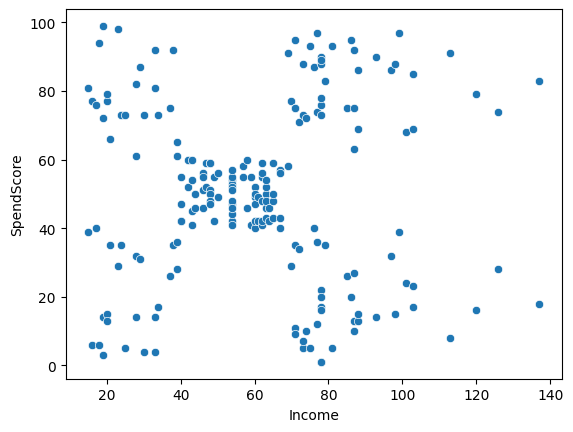

In [7]:
import seaborn as sns
sns.scatterplot(data=df, x='Income', y='SpendScore')

### Get X features

In [8]:
X = df[['Income','SpendScore']]
X.head()

,Income,SpendScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Create a preprocessing pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
# Numeric Pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Apply Elbow method to get Optimum number of clusters

In [12]:
%pip install yellowbrick


                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
     -                                        10.2/282.6 kB ? eta -:--:--
     -                                        10.2/282.6 kB ? eta -:--:--
     -                                        10.2/282.6 kB ? eta -:--:--
     ----                                  30.7/282.6 kB 146.3 kB/s eta 0:00:02
     ----                                  30.7/282.6 kB 146.3 kB/s eta 0:00:02
     ----                                  30.7/282.6 kB 146.3 kB/s eta 0:00:02
     ----                                  30.7/282.6 kB 146.3 kB/s eta 0:00:02
     ----                                  30.7/282.6 kB 146.3 kB/s eta 0:00:02
     ----                                  30.7/282.6 kB 146.3 kB/s eta 0:00:02
     ----                                  30.7/282.6 kB 146.3 kB/s eta 0:00:0


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and run all cells

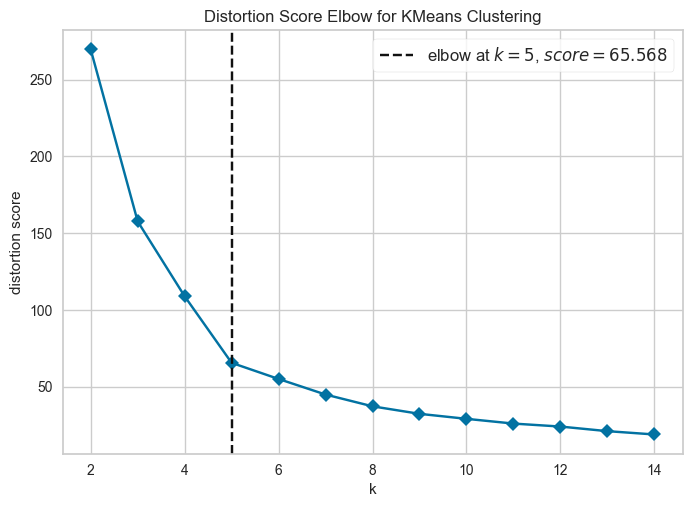

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [13]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
kelbow_visualizer(KMeans(),
                  X_pre,
                  k = (2,15),
                  timings=False)

### Create K=5 cluster

In [14]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [15]:
lb = model.labels_
lb

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [16]:
X['Label']=lb

In [17]:
X

,Income,SpendScore,Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


### Check different labels

In [18]:
X[X['Label']==0]

,Income,SpendScore,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [19]:
X[X['Label']==1]

,Income,SpendScore,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [20]:
X[X['Label']==2]

,Income,SpendScore,Label
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2


In [21]:
X[X['Label']==3]

,Income,SpendScore,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [22]:
X[X['Label']==4]

,Income,SpendScore,Label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


### Visualize then clusters

<Axes: xlabel='Income', ylabel='SpendScore'>

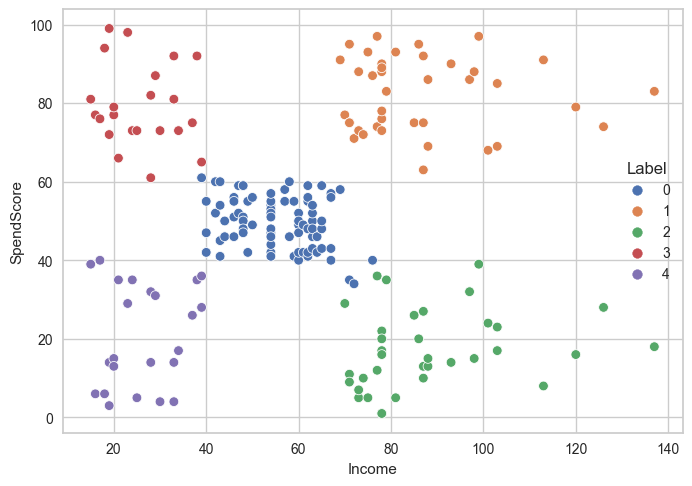

In [24]:
sns.scatterplot(data=X, x='Income',y='SpendScore',hue='Label',palette='deep')

### Clustering on basis of Age, Income and Spend

In [25]:
X = df[['Age','Income','SpendScore']]

In [26]:
X

,Age,Income,SpendScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [27]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [28]:
X_pre = num_pipe2.fit_transform(X)
X_pre

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

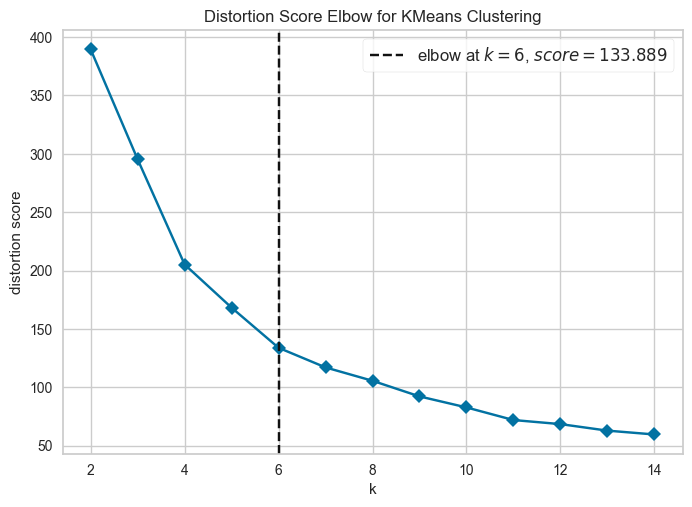

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [29]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

In [30]:
model2 = KMeans(n_clusters=6)
model2.fit(X_pre)

KMeans(n_clusters=6)

In [31]:
lb2 = model2.labels_
lb2

array([4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 2,
       5, 4, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [32]:
X['Label']=lb2

In [33]:
X

,Age,Income,SpendScore,Label
0,19,15,39,4
1,21,15,81,4
2,20,16,6,5
3,23,16,77,4
4,31,17,40,5
...,...,...,...,...
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1


In [34]:

for i in range(6):
    print(f'Label : {i} \n')
    display(X[X['Label']==i])
    print('\n========================================\n')

Label : 0 



,Age,Income,SpendScore,Label
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0
141,32,75,93,0




Label : 1 



,Age,Income,SpendScore,Label
126,43,71,35,1
128,59,71,11,1
130,47,71,9,1
134,20,73,5,1
136,44,73,7,1
138,19,74,10,1
140,57,75,5,1
144,25,77,12,1
146,48,77,36,1
148,34,78,22,1




Label : 2 



,Age,Income,SpendScore,Label
43,31,39,61,2
47,27,40,47,2
48,29,40,42,2
49,31,40,42,2
51,33,42,60,2
52,31,43,54,2
58,27,46,51,2
61,19,46,55,2
65,18,48,59,2
68,19,48,59,2




Label : 3 



,Age,Income,SpendScore,Label
40,65,38,35,3
46,50,40,55,3
50,49,42,52,3
53,59,43,60,3
54,50,43,45,3
55,47,43,41,3
56,51,44,50,3
57,69,44,46,3
59,53,46,46,3
60,70,46,56,3




Label : 4 



,Age,Income,SpendScore,Label
0,19,15,39,4
1,21,15,81,4
3,23,16,77,4
5,22,17,76,4
7,23,18,94,4
9,30,19,72,4
11,35,19,99,4
13,24,20,77,4
15,22,20,79,4
17,20,21,66,4




Label : 5 



,Age,Income,SpendScore,Label
2,20,16,6,5
4,31,17,40,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5


### Visualize data

In [35]:
%pip install plotly nbformat

                                              0.0/15.6 MB ? eta -:--:--
                                              0.0/15.6 MB ? eta -:--:--
                                             0.0/15.6 MB 262.6 kB/s eta 0:01:00
                                             0.0/15.6 MB 245.8 kB/s eta 0:01:04
                                             0.1/15.6 MB 326.1 kB/s eta 0:00:48
                                             0.1/15.6 MB 302.7 kB/s eta 0:00:52
                                             0.1/15.6 MB 327.7 kB/s eta 0:00:48
                                             0.1/15.6 MB 343.4 kB/s eta 0:00:46
                                             0.1/15.6 MB 387.0 kB/s eta 0:00:40
                                             0.2/15.6 MB 366.6 kB/s eta 0:00:43
                                             0.2/15.6 MB 406.9 kB/s eta 0:00:38
                                             0.2/15.6 MB 401.2 kB/s eta 0:00:39
                                             0.2/15.6 MB


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and run all cells

In [36]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X, x='Age', y='Income', z='SpendScore', color='Label')
fig.show()